In [1]:
#ML LIBRARIES
import pandas as pd
import numpy as np
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [2]:
#DEEP LEARNING LIBRRARIES
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [3]:
train_data = pd.read_csv("train.txt",header = None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")

In [4]:
train_data['length'] = [len(x) for x in train_data['Comment']]

In [5]:
train_data['length']

0         23
1        108
2         48
3         92
4         20
        ... 
15995    101
15996    102
15997     30
15998     59
15999     62
Name: length, Length: 16000, dtype: int64

In [6]:
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [7]:
train_data.shape

(16000, 3)

In [8]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [9]:
train_data.duplicated().sum()

1

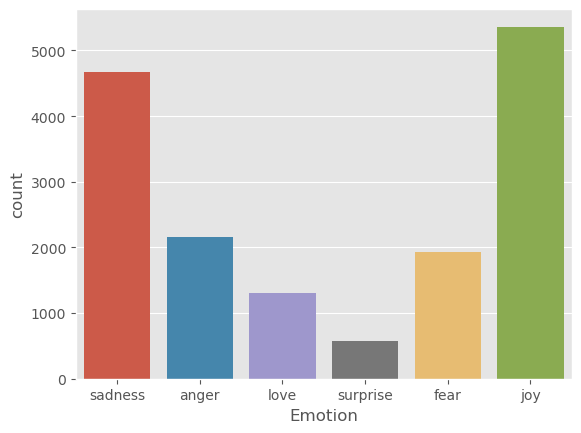

In [10]:
#EDA
sns.countplot(x=train_data['Emotion'])
plt.show()

<Axes: xlabel='length', ylabel='Count'>

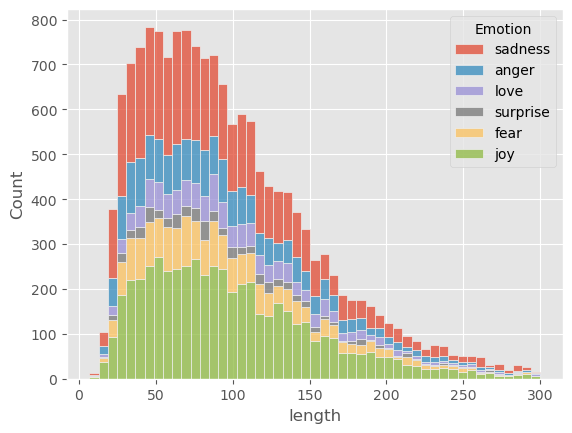

In [11]:
df2 = train_data.copy()
df2['length'] = [len(x) for x in train_data['Comment']]
Length_value = df2['length'].values
sns.histplot(data = df2, x ='length', hue = 'Emotion',multiple='stack')

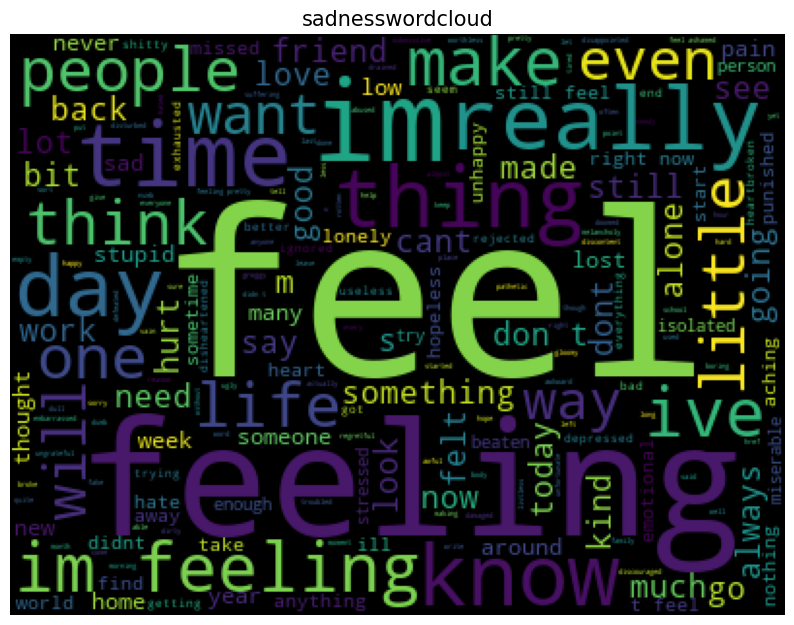

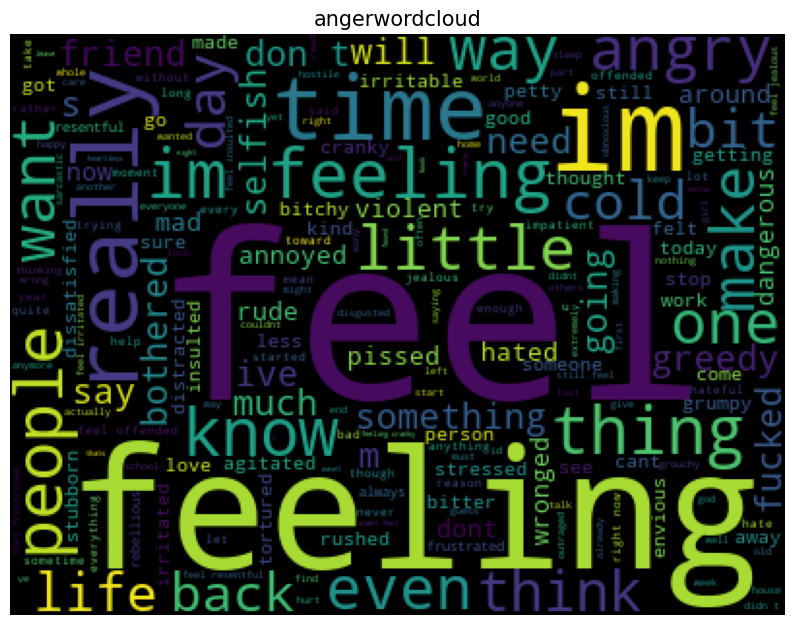

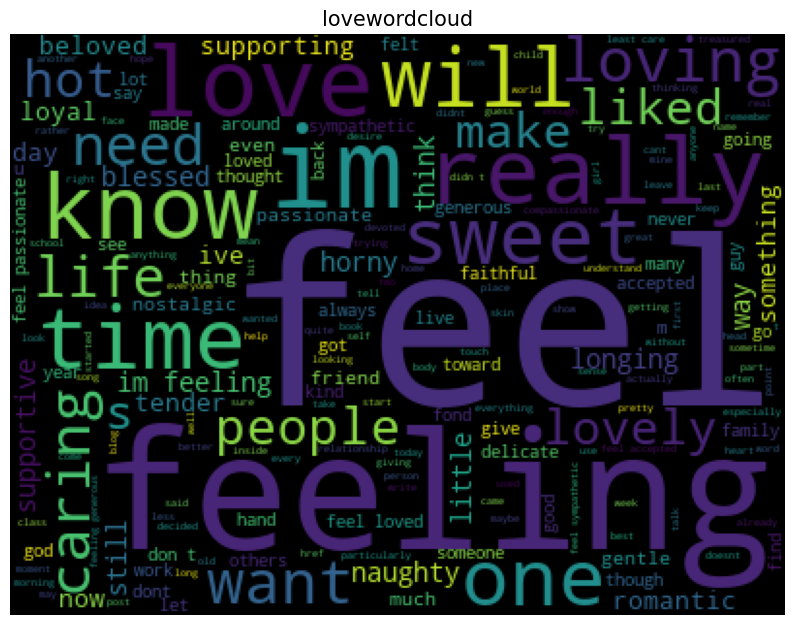

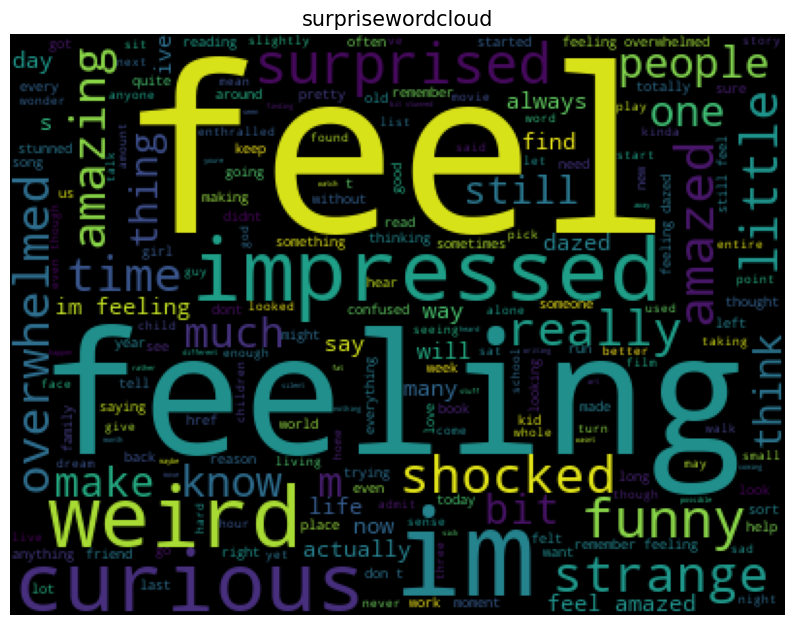

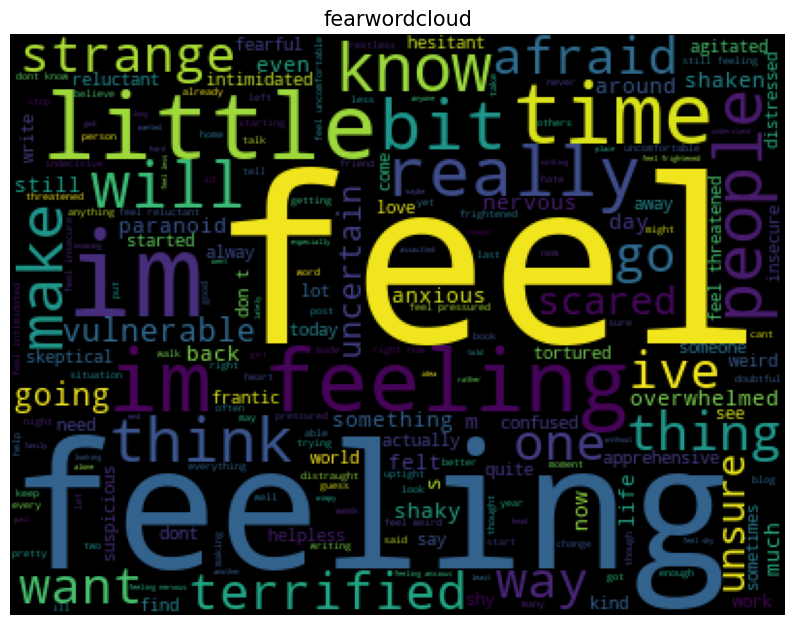

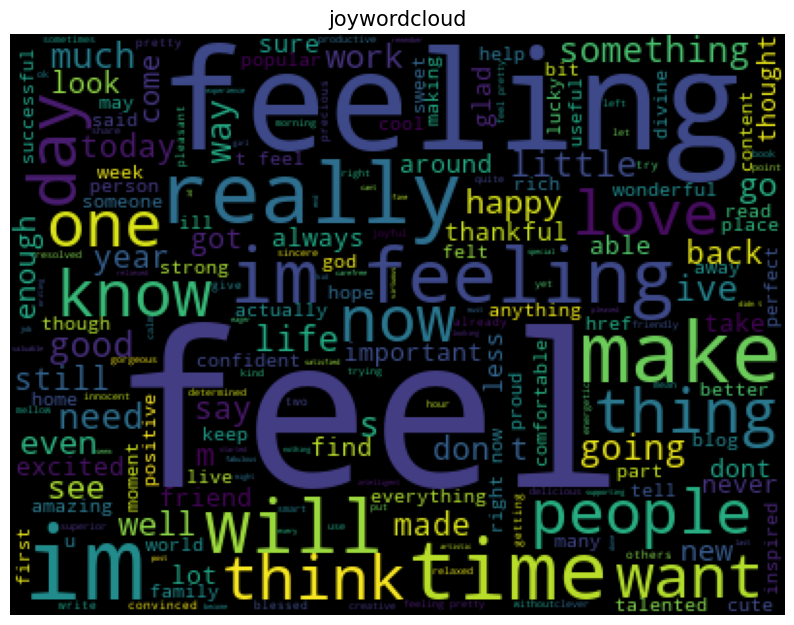

In [12]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df + 'wordcloud', size =15)
    plt.imshow(wordcloud)
    plt.axis('off')
emotion_list = train_data['Emotion'].unique()
for Emotion in emotion_list:
    text = " ".join([sentence for sentence in train_data.loc[train_data['Emotion']==Emotion,'Comment']])
    wordcloud = WordCloud(width = 400, height = 300).generate(text)
    words_cloud(wordcloud, Emotion)

In [13]:
#Data Preprocessing
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [14]:
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [16]:
df = train_data.copy()

In [17]:
df.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [18]:
from tqdm import tqdm
tqdm.pandas()
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))


def clean_data(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]"," ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)
df['cleaned_comment'] = df['Comment'].progress_apply(clean_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:06<00:00, 2577.95it/s]


In [19]:
df.head()

,Comment,Emotion,length,cleaned_comment
0,i didnt feel humiliated,4,23,didnt feel humili
1,i can go from feeling so hopeless to so damned...,4,108,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,0,48,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,3,92,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,0,20,feel grouchi


In [20]:
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_comment'],df['Emotion'],test_size=0.2,random_state=42)

In [21]:
tfidfvectorizer = TfidfVectorizer()
X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)

In [22]:
X_train_tfidf.shape

(12800, 9257)

In [23]:
classifier={
    'MultinomialNB':MultinomialNB(),
    'LogisticRegression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine':SVC(),
}
for name, clf in classifier.items():
    print(f"\n==============={name}============")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"======{accuracy_tfidf}=====")
    print("Classification Report")
    print(classification_report(y_test, y_pred_tfidf))


===============MultinomialNB============
======0.655=====
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200


===============LogisticRegression============


C:\Users\risha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


======0.829375=====
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
           4       0.88      0.92      0.90       946
           5       0.77      0.45      0.57       113

    accuracy                           0.83      3200
   macro avg       0.82      0.72      0.76      3200
weighted avg       0.83      0.83      0.82      3200


===============Random Forest============
======0.84875=====
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       427
           1       0.83      0.84      0.83       397
           2       0.84      0.90      0.87      1021
           3       0.81      0.60      0.69       296
           4       0.91      0.89      0.90       946
       

In [24]:
#logistic regression
lg = LogisticRegression()
lg.fit(X_train_tfidf, y_train)
lg_y_pred = lg.predict(X_test_tfidf)

C:\Users\risha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
def predict_emotion(input_text):
    cleaned_text = clean_data(input_text)
    input_vectorizer = tfidfvectorizer.transform([cleaned_text])
    predicted_label = lg.predict(input_vectorizer)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(lg.predict(input_vectorizer))
    return predicted_emotion, label
    

In [26]:
predict_emotion("She breakup with me")

('sadness', 4)

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
rf_y_pred = rf.predict(X_test_tfidf)

In [28]:
def predict_emotion(input_text):
    cleaned_text = clean_data(input_text)
    input_vectorizer = tfidfvectorizer.transform([cleaned_text])
    
    predicted_label = lg.predict(input_vectorizer)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(lg.predict(input_vectorizer))
    
    return predicted_emotion, label

In [29]:
predict_emotion("She loves me a lot")

('love', 3)

In [30]:
predict_emotion("How shame it is")

('sadness', 4)

In [31]:
predict_emotion("Hurrah, we won the match")

('joy', 2)

In [32]:
import pickle
pickle.dump(lg, open("logistic_regression.pkl","wb"))
pickle.dump(lb, open("label_encoder.pkl", "wb"))
pickle.dump(tfidfvectorizer, open("tfidfvectorizer.pkl", "wb"))

In [33]:
#DL WITH LSTM
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []
    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ",text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding="pre")
    return pad

In [34]:
X_train = text_cleaning(train_data, "Comment", vocab_size=11000, max_len=300)
y_train = to_categorical(train_data["Emotion"])

In [35]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(input_dim = 11000, output_dim = 150, input_length = 300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])

callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(X_train, y_train, epochs = 1, batch_size = 64, verbose = 1, callbacks=[callback])

C:\Users\risha\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 182s 707ms/step - accuracy: 0.3083 - loss: 1.6418


C:\Users\risha\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


In [37]:
#Discord
#Machine Learning
model.save('my_model.keras')


In [40]:
def predictive_system_dl(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ",sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding="pre")
    return pad

In [44]:
sentence = predictive_system_dl("I am feeling love with you")
result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=1))[0]
prob = np.max(model.predict(sentence))
print(f"{result} with probability of {prob}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
sadness with probability of 0.25645604729652405


In [45]:

with open("lb1.pkl","wb") as f:
    pickle.dump(lb,f)
vocab_info = {"vocab_size": 11000, "max_len":300}
with open("vocab_info.pkl","wb") as f:
    pickle.dump(vocab_info, f)